In [29]:
import xarray as xr
import numpy as np
import rioxarray
import geopandas as gpd
import os
from glob import glob

In [30]:
pathIn = f"~/data/polar/source/bedrock_topography_and_geothermal_heat_flux_antarctica_goce"
pathIn = os.path.expanduser(pathIn)

pathOut = f"~/data/polar/cubes/bedrock_topography_and_geothermal_heat_flux_antarctica_goce"
pathOut = os.path.expanduser(pathOut)

if not os.path.exists(pathOut):
    os.makedirs(pathOut)
    
filepath = os.path.join(pathIn,f'SMOS_IceThickness_2015_300.nc')

In [31]:
da = xr.open_dataset(filepath)
da = da.where(lambda x: x>0,other=np.nan)
da = da.sel(lat=slice(-90,-60))
da = da[["mrg"]].rio.write_crs(4326)
da = da.rename(dict(lon="x",lat="y"))
da = da.rio.reproject("EPSG:3031",nodata=np.nan)
da = da.chunk(dict(x=2048,y=2048))

da.to_zarr(f"{pathOut}/ice_thickness.zarr")

<xarray.Dataset>
Dimensions:      (x: 3476, y: 3476)
Coordinates:
  * x            (x) float64 -3.337e+06 -3.335e+06 ... 3.336e+06 3.338e+06
  * y            (y) float64 3.337e+06 3.335e+06 ... -3.336e+06 -3.338e+06
    spatial_ref  int64 0
Data variables:
    mrg          (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>

In [12]:
ice = ice.to_dataset()

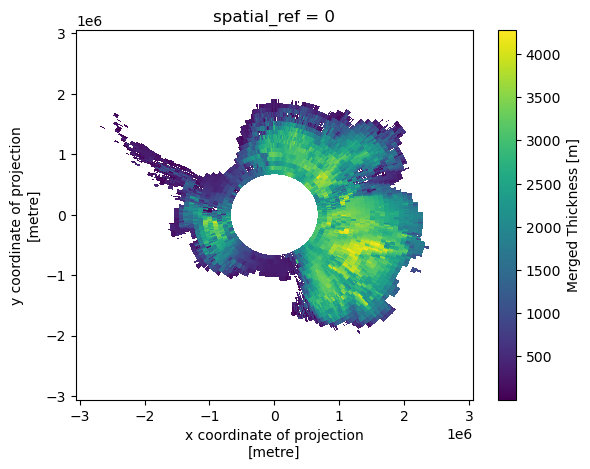

In [20]:
ice_polar.mrg.plot()

In [2]:
import xarray as xr
import numpy as np
import rioxarray
import geopandas as gpd
import os
from glob import glob

def regrid(filepath):
    
    da = xr.open_dataset(filepath)
    
#     x = np.arange(da.x_range[0],da.x_range[1],da.spacing[0].values)
#     y = np.arange(da.y_range[0],da.y_range[1],da.spacing[1].values)
#     z = np.reshape(da.z.values,(da.dimension[1].values,da.dimension[0].values))
    
#     da = xr.DataArray(
#         data=z,
#         dims=["y", "x"],
#         coords=dict(
#             y=("y", y),
#             x=("x", x),
#         ),
#     )
    
    return da

size = 300

pathIn = f"~/data/polar/source/geothermal_heat_flow_uncertainty_{size}x{size}km_xyz_data"
pathIn = os.path.expanduser(pathIn)

pathOut = f"~/data/polar/cubes/geothermal_heat_flow_uncertainty_{size}x{size}km_xyz_data"
pathOut = os.path.expanduser(pathOut)

if not os.path.exists(pathOut):
    os.makedirs(pathOut)
    
filepath = os.path.join(pathIn,f'{size}km_GHF_uncertainty.nc')

da = regrid(filepath)

# da.name = f"geothermal_heat_flow_uncertainty_{size}km"

# da = da.to_dataset()
# da = da.chunk(dict(x=2048,y=2048))

# da = da.where(lambda x: x>=0,other=np.nan)

# da.to_zarr(f"{pathOut}/curie_depth_{size}km.zarr")

In [3]:
da

<xarray.Dataset>
Dimensions:    (side: 2, xysize: 11526801)
Dimensions without coordinates: side, xysize
Data variables:
    x_range    (side) float64 ...
    y_range    (side) float64 ...
    z_range    (side) float64 ...
    spacing    (side) float64 ...
    dimension  (side) int32 ...
    z          (xysize) float32 ...
Attributes:
    title:    
    source:

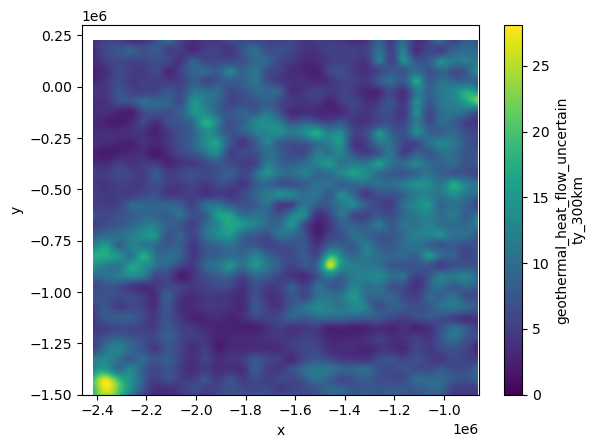

In [38]:
da.geothermal_heat_flow_uncertainty_300km.plot()

In [21]:
da.chunk(dict(x=2048,y=2048))

<xarray.Dataset>
Dimensions:                     (y: 3601, x: 3201)
Coordinates:
  * y                           (y) float64 -1.5e+06 -1.5e+06 ... 2.998e+05
  * x                           (x) float64 -2.46e+06 -2.46e+06 ... -8.602e+05
Data variables:
    geothermal_heat_flow_300km  (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>

In [17]:
da.chunk(dict(x=2048,y=2048))

<xarray.Dataset>
Dimensions:                     (y: 18700, x: 16700)
Coordinates:
  * y                           (y) float64 -1.485e+06 -1.485e+06 ... 3.849e+05
  * x                           (x) float64 -2.475e+06 -2.475e+06 ... -8.051e+05
Data variables:
    geothermal_heat_flow_200km  (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>

In [9]:
da.geothermal_heat_flow_300km.min()

<xarray.DataArray 'geothermal_heat_flow_300km' ()>
array(-3.40282347e+38)